In [2]:
import numpy as np
import pandas as pd
import funciones as fn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

from feature_engine.imputation import AddMissingIndicator, MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper
import myPreprocessors as mypp ## nuestra libreria de transformaciones

import joblib

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data.describe()
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
data = data.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
test = test.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis = 1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [8]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
cat_cols, discr_cols, continues_col = fn.getColumnsDataTypes(data)

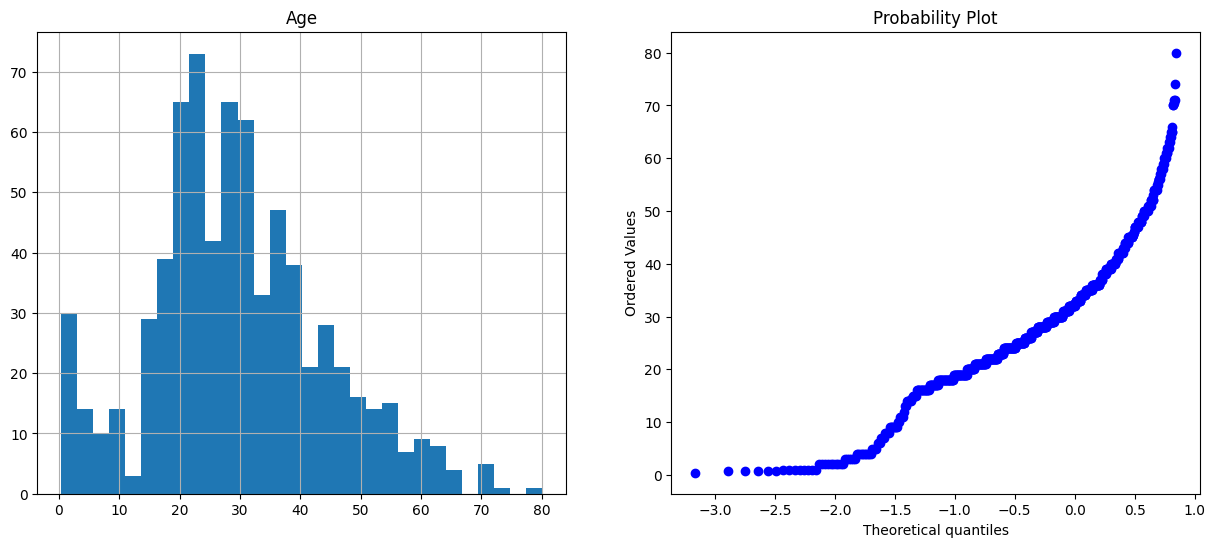

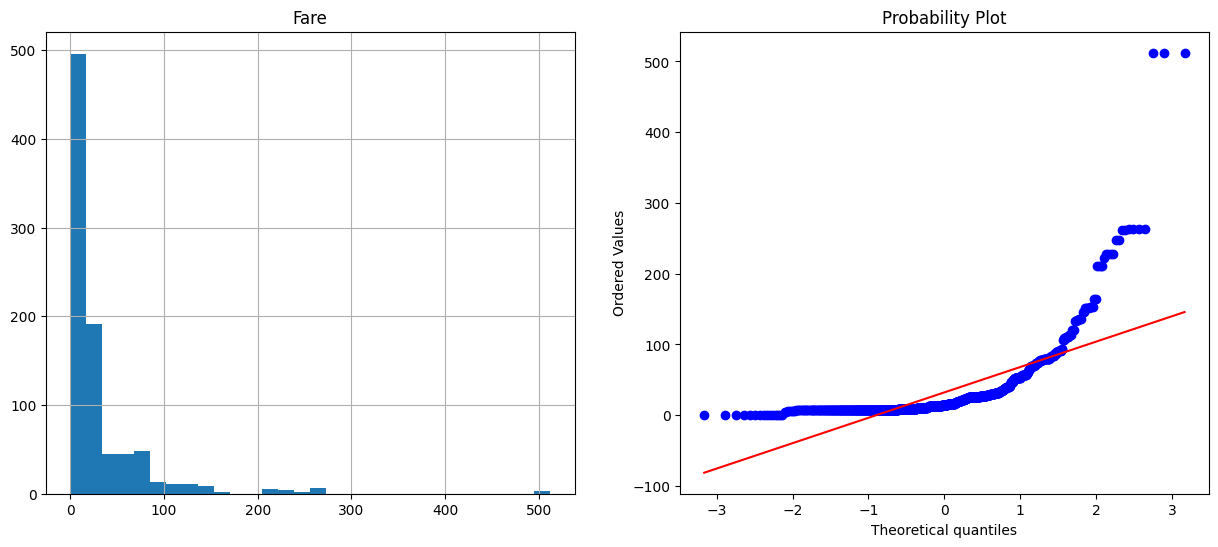

In [10]:
for col in continues_col:
    fn.plot_density_variable(data, col) 

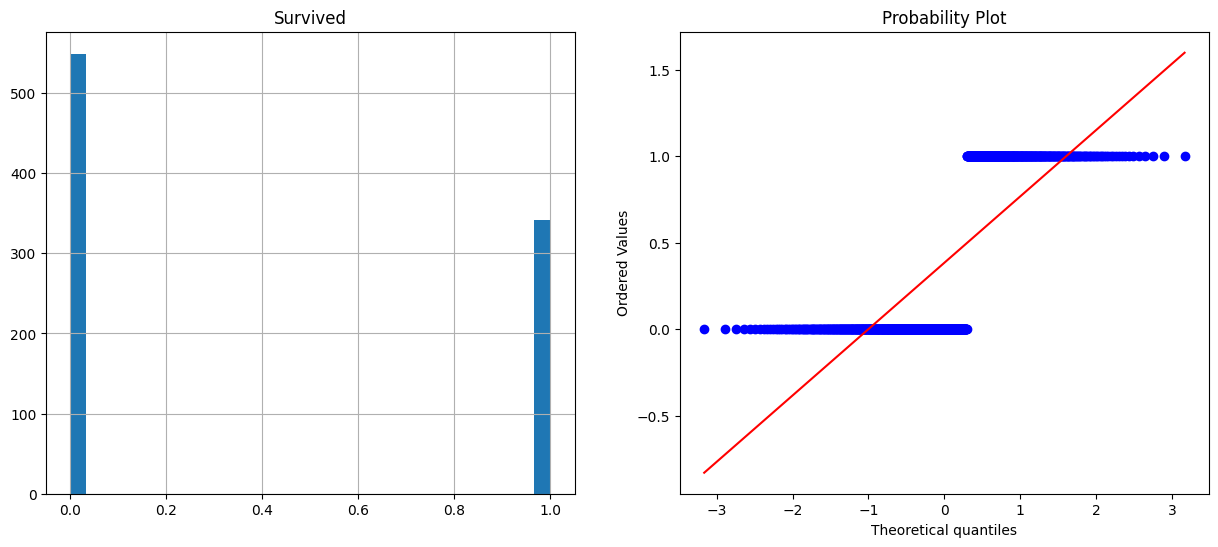

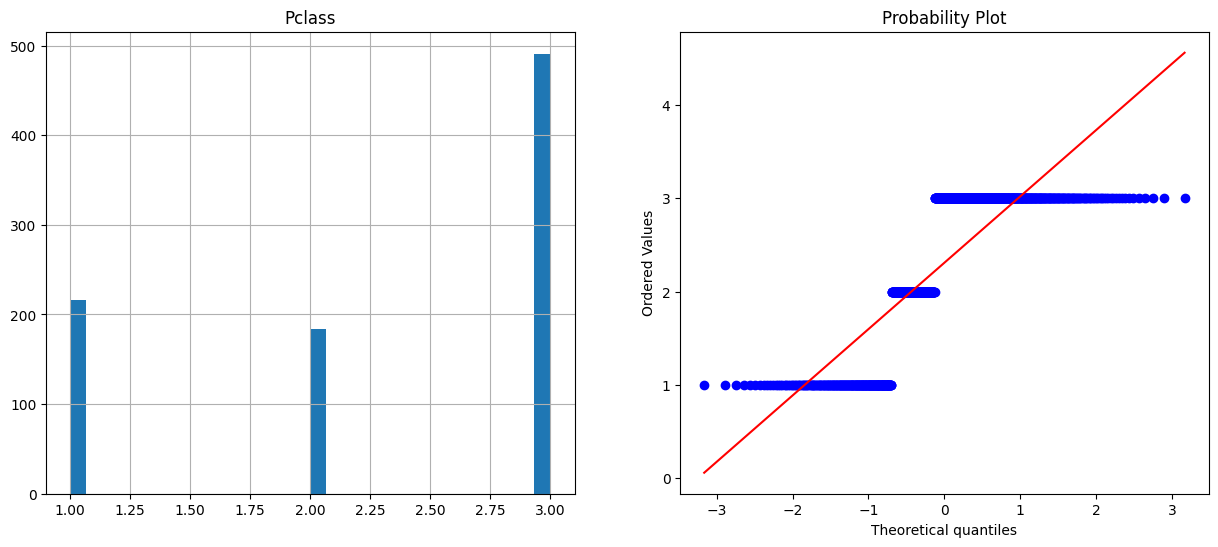

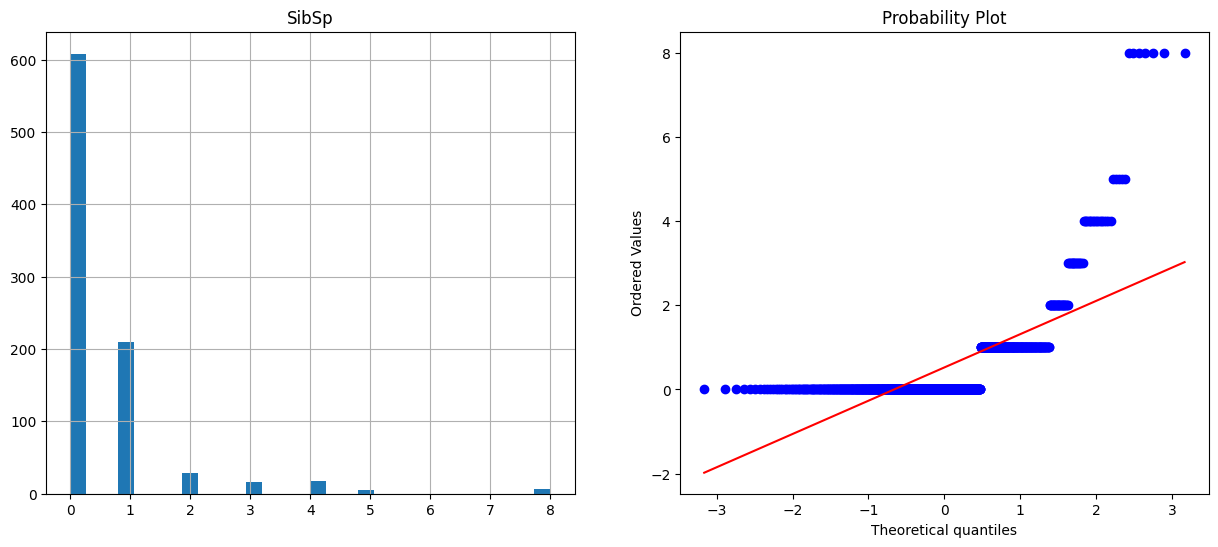

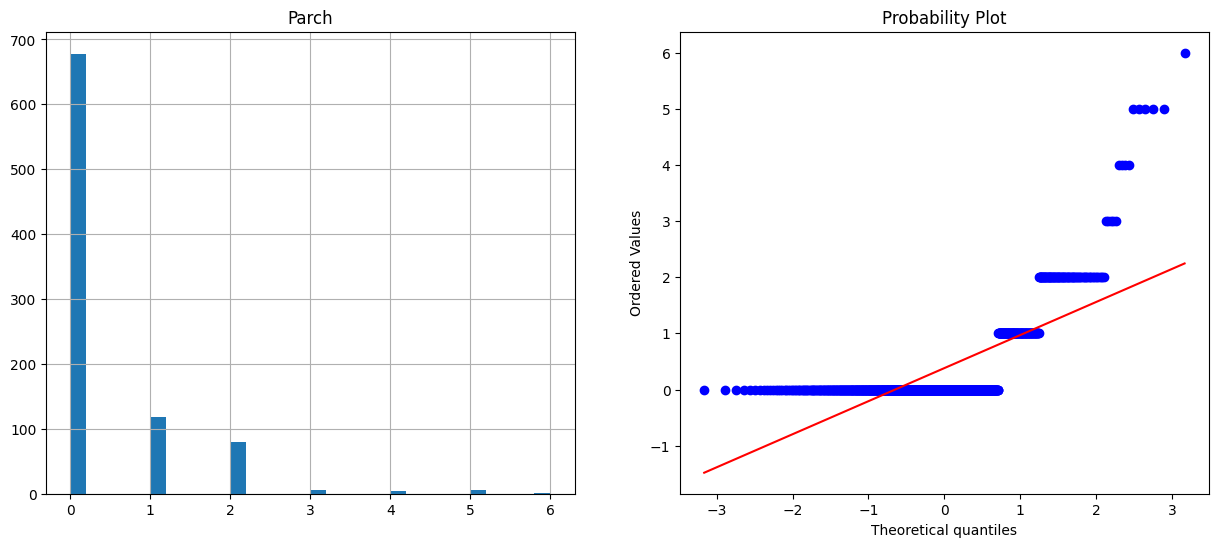

In [11]:
for col in discr_cols:
    fn.plot_density_variable(data, col) 

In [12]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
#Label encoder
data['Embarked'] = data['Embarked'].astype('category')
data['Embarked'] = data['Embarked'].cat.codes
data['Sex'] = data['Sex'].astype('category')
data['Sex'] = data['Sex'].cat.codes
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [14]:
#Label encoder
test['Embarked'] = test['Embarked'].astype('category')
test['Embarked'] = test['Embarked'].cat.codes
test['Sex'] = test['Sex'].astype('category')
test['Sex'] = test['Sex'].cat.codes
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [15]:
fn.FillNaN_Corr_DF(data, 'Age', 'Sex')

La media es: 30.0
La mediana es: 28.0
0.08465991547420455
0.08116253523893883
Validacion Valores Nulos:
0


In [16]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
fn.FillNaN_Corr_DF(test, 'Age', 'Sex')

La media es: 30.0
La mediana es: 27.0
-0.0006624085608094944
-0.008034511662758282
Validacion Valores Nulos:
0


In [18]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [19]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')